<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="_Dataoving2.ipynb">Dataøving 2</a>
    </div>
    <ul class="nav navbar-nav">
        <li class="active"><a href="Oppgave1.ipynb">Oppgave1 - Digitale Signal og Diskrét Datarepresentasjon.</a></li>
        <li><a href="Oppgave2.ipynb">Oppgave 2 - Signalanalyse med DFT.</a></li>
        <li><a href="Oppgave3.ipynb">Oppgave 3 - Signalgenerasjon med IDFT.</a></li>
        <li><a href="Oppgave4.ipynb">Oppgave 4 - Reparasjon av lydsignal.</a></li>
    </ul>
  </div>
</nav>

# Digitale Signal og Diskrét Datarepresentasjon

__Læringsmål:__
* Håndtering av digitale signal med hensyn på samplenummer.
* Forholdet mellom samplenummer og samplingstidspunkt.
* Plotting av diskréte datasett.

__Bibliotek og notebook-konfigurasjon:__

In [1]:
from numpy import sin, cos, pi, exp, mean, absolute, angle # Sentrale matematiske funksjoner
import numpy as np
import matplotlib.pyplot as plt

%matplotlib ipympl

__Introduksjon:__
Hoveddelen av dette emnet vil vi arbeide med digitale signal, som er en såkalt tidsdiskrét utgave av et reelt analogt signal. Dette er en serie med målinger for tidspunktene $t = n\cdot T_s, \ \ n \in \mathbb{Z}$ der $T_s$ er samplingsfrekvensen. Forholdet mellom et digitalt signal $x[n]$ og et analogt signal $x(t)$ er altså:
$$ x[n] = x(n\cdot T_s)$$

Dersom vi ønsker å generere en digital sinus-sekvens $x[n]$ for en sinusbølge med frekvens $f = 100Hz$, og samplingsfrekvens $f_s = 2400Hz$, så blir uttrykket slik vist nedenfor, der den _digitale perioden_ $M$ er 24 sampler, noe som betyr at sinus-sekvensen gjentar seg selv etter 24 sampler.
$$x[n] = \cos\left(2\pi \cdot 100 \cdot n \cdot T_s \right) = \cos \left(2\pi\frac{100}{2400}\cdot n \right) = \cos \left(\frac{\pi}{12}\cdot n \right)$$
De første 100 samplene i et slikt signal kan vi generere med koden nedenfor.

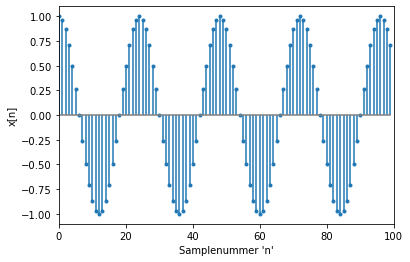

In [2]:
f = 100         # Bølgefrekvens
f_s = 2400      # Samplingsfrekvens
N = 100         # Antall Sampler
n = np.arange(N)# Samplenummer
x = cos(2*pi*f/f_s*n) # Signal x[n]

# Funksjonen Stem brukes til å lage et stolpediagram av signalet x[n]
# Nedenfor vises et kall til stem-funksjonen der linjestil, punktstil og baselinje er spesifisert.
# P.S. Det er ikke nødvendig å ta i bruk alle disse parametrene hver gang du skal lag et stolpediagram.
plt.stem(n, # Samplenummer
         x, # Signalverdier gitt samplenummer (x[n])
         linefmt='-', # Linjestil stolper
         markerfmt='.', # Punktstil for stem-markere. Default er 'o' (stor prikk)
         basefmt='grey', # Farge på y=0 basen
         use_line_collection=True # Bruker en "ny" datatype som matplotlib er i ferd med å ta i bruk. True er anbefalt.
         )
plt.xlabel("Samplenummer 'n'")
plt.ylabel("x[n]")
plt.xlim([0, N])
plt.show()

## a)

Et sinussignal med frekvens $f = 14 Hz$ samples med samplingfrekvens $f_s = 16Hz$, og vi ønsker å studere et utklipp med varighet lik $T=1s$. Lag en figur som viser et "vanlig" kontinuerlig plot av sinuskurven sammen med et stolpediagram som viser de 16 samplene som tas i løpet av 1 sekund.

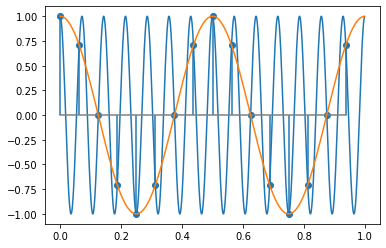

In [3]:
f = 14
f_s = 16

t = np.linspace(0, 1, 1000, endpoint=False)  # Tidsvektor med høy oppløsning
t_n = np.linspace(0, 1, f_s, endpoint=False) # Tidspunktene der samplingforekommer

x_t = cos(2*pi*f*t)
x_n = cos(2*pi*f*t_n)

plt.figure()
plt.plot(t, x_t)
plt.stem(t_n, # Samplenummer
         x_n, # Signalverdier gitt samplenummer (x[n])
         basefmt='grey', # Farge på y=0 aksen
         use_line_collection=True # Hvordan stem skal håndtere dataene. Bruk alltid True.
         )

## Deloppgave b)
f_alias = f-f_s
x_alias = cos(2*pi*f_alias*t)
plt.plot(t, x_alias)
plt.show()

## b)
Utvid koden i oppgave __a)__ slik at figuren _også_ viser bølgeformen til signalet som vil rekonstrueres med samplene som utgangspunkt. Her må vi altså finne originalsignalets *Alias*